In [24]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
df = pd.read_csv("scaled_customer_features.csv")
df.head(3)

,Customer ID,Recency_scaled,Frequency_scaled,Monetary_scaled,AvgUnitPrice_scaled,UniqueItems_scaled,AvgQuantPerOrder_scaled
0,12346.0,2.334858,-0.424675,8.359634,-0.100146,-0.708687,60.891574
1,12347.0,-0.905199,0.354080,0.251046,-0.053249,0.486336,-0.028273
2,12348.0,-0.175186,-0.035297,-0.028547,0.037994,-0.462653,0.022638


In [8]:
X = df.drop(columns=["Customer ID"])
X.head(1)

,Recency_scaled,Frequency_scaled,Monetary_scaled,AvgUnitPrice_scaled,UniqueItems_scaled,AvgQuantPerOrder_scaled
0,2.334858,-0.424675,8.359634,-0.100146,-0.708687,60.891574


In [10]:
pca = PCA()
pca.fit(X)
X_pca = pca.transform(X)

In [12]:
print(pca.explained_variance_ratio_)

[0.37258459 0.18646235 0.16644307 0.14158046 0.08803187 0.04489767]


In [13]:
print(np.cumsum(pca.explained_variance_ratio_))


[0.37258459 0.55904694 0.72549001 0.86707047 0.95510233 1.        ]


In [18]:
features = X.columns
loading = pd.DataFrame(
    pca.components_,
    columns=features,
    index=[f"PC{i+1}" for i in range(len(features))]
)

loading

,Recency_scaled,Frequency_scaled,Monetary_scaled,AvgUnitPrice_scaled,UniqueItems_scaled,AvgQuantPerOrder_scaled
PC1,-0.307848,0.594914,0.483845,-0.016968,0.559099,0.065744
PC2,0.361591,-0.051646,0.378530,0.153705,-0.165283,0.819973
PC3,-0.009445,0.033239,-0.004502,0.984140,0.013584,-0.173403
PC4,0.851224,0.221962,0.192229,-0.072908,0.112602,-0.413768
PC5,-0.222696,-0.109595,0.701004,-0.047074,-0.574194,-0.339225
PC6,-0.014712,0.762251,-0.306969,-0.004796,-0.563496,0.083521


PC1（37.3%）：顧客價值與活躍度
PC1 與 Frequency、Monetary、UniqueItems 呈高度正相關，並與 Recency 負相關。
代表顧客的「價值與活躍程度」。PC1 越高，顧客越常購買、消費越高、商品種類越多。

PC2（18.6%）：大宗採購、批發型
PC2 主要由 AvgQuantPerOrder 主導，反映一次購買大量商品的批發型行為。
PC2 越高，顧客越可能屬於企業採購或大批量購買者。

PC3（16.6%）：單價偏好
PC3 幾乎完全由 AvgUnitPrice 主導，代表顧客對商品單價的偏好。

PC4 (14.2%)：Recency 時間
PC4 的主要負荷為 Recency，反映顧客距離最近一次購買的時間。

PC5 (8.8%): 買貴但種類少
PC6 (4.5%): 頻繁買同一種

前三個主成分（PC1–PC3）合計解釋 72.55% 的資料變異，
且其 loading 結構分別對應顧客價值、批量採購、與商品單價偏好三種顧客行為構面。
因此選擇前 3 個主成分作為降維後的表示，用於後續的 clustering 與模式分析。

In [20]:
X_pca

array([[ 6.68206010e+00,  5.40617662e+01, -1.07407956e+01,
        -2.17672846e+01, -1.48575651e+01,  2.56132783e+00],
       [ 8.81732571e-01, -3.62321335e-01, -2.17070693e-02,
        -5.73333403e-01,  7.16098002e-02, -7.00023586e-02],
       [-2.38705178e-01,  2.85426276e-02,  2.77907808e-02,
        -2.26677873e-01,  2.79054651e-01,  2.46846228e-01],
       ...,
       [-3.42882020e-01, -2.96756366e-01,  1.79627368e-02,
        -8.78508350e-01,  4.17107573e-01,  1.75647790e-01],
       [ 2.49919476e+00, -8.31019688e-01,  1.55571150e-02,
        -1.27175506e-01, -1.30533505e+00, -1.61178869e-01],
       [ 2.63768112e-02, -2.05206444e-01, -8.30051748e-02,
        -4.51154022e-01,  1.39359991e-01, -9.60427401e-02]])

In [21]:
df_pca3 = pd.DataFrame({
    "Customer ID": df["Customer ID"],
    "PC1": X_pca[:,0],
    "PC2": X_pca[:,1],
    "PC3": X_pca[:,2]
})
df_pca3.head(3)

,Customer ID,PC1,PC2,PC3
0,12346.0,6.682060,54.061766,-10.740796
1,12347.0,0.881733,-0.362321,-0.021707
2,12348.0,-0.238705,0.028543,0.027791


In [22]:
df_pca3.to_csv("pca_3d_features.csv", index=False)

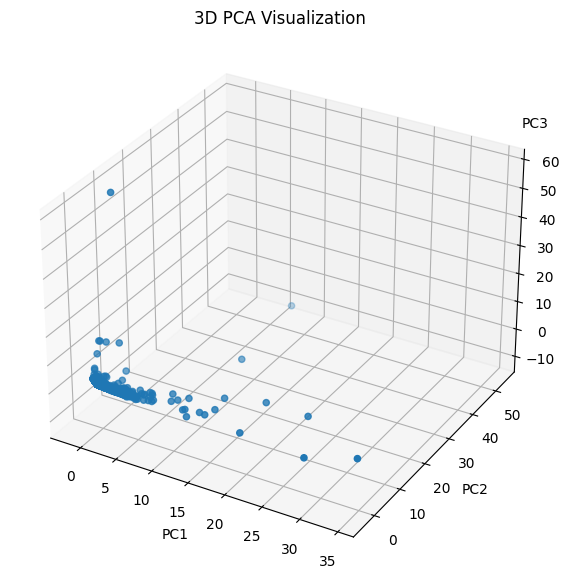

In [61]:
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_pca3["PC1"], df_pca3["PC2"], df_pca3["PC3"])

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

# 不再用 zlabel，避免被邊界吃掉
# ax.set_zlabel("PC3")

ax.set_title("3D PCA Visualization")

# 在圖框「裡面」手動寫上 PC3（永遠不會被切）
ax.text2D(0.999, 0.83, "PC3",
          transform=ax.transAxes,   # 用圖框座標(0~1)
          va="center", ha="right")

plt.show()